In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import models.elec_motor_model as elecmotmod
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=18)


In [2]:
# Parameters
abbr = "H03"

In [3]:
# Parameters
abbr = "H17"


In [4]:
preprocess(abbr, verbose=False)
emm_df = elecmotmod.emm_main(abbr)

H17 : Exported ELECMOTMOD CSV in data/runs/H17/models/H17_2023_04_19-18_39_17-SG-grandaxe03_elecmotmod.csv


In [5]:
print(emm_df.columns.values)

['time' 'time_rel' 'vx' 'vy' 'vz' 'px' 'py' 'pz' 'theta' 'phi' 'wz' 'ax'
 'ay' 'az' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL' 'wR' 'voltage' 'V_L'
 'V_R' 'current_cpu' 'I_L' 'I_R' 'ax_corr' 'ay_corr' 'az_corr' 'v' 'a'
 'vL' 'vR' 'PE_L' 'PE_R' 'Tmot_L' 'Tmot_R' 'TL' 'TR' 'PM_L' 'PM_R'
 'P_logical' 'P_motion' 'PE_motion' 'P_total' 'P_mot' 'P_log' 'dI_L'
 'dI_R' 'dt' 'dILdt' 'dIRdt']


In [6]:
model_name = elecmotmod.__MODEL_NAME__.lower()
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename, subdir=model_name)
model_name = elecmotmod.__MODEL_NAME__.title()
cmap = plt.get_cmap("turbo")

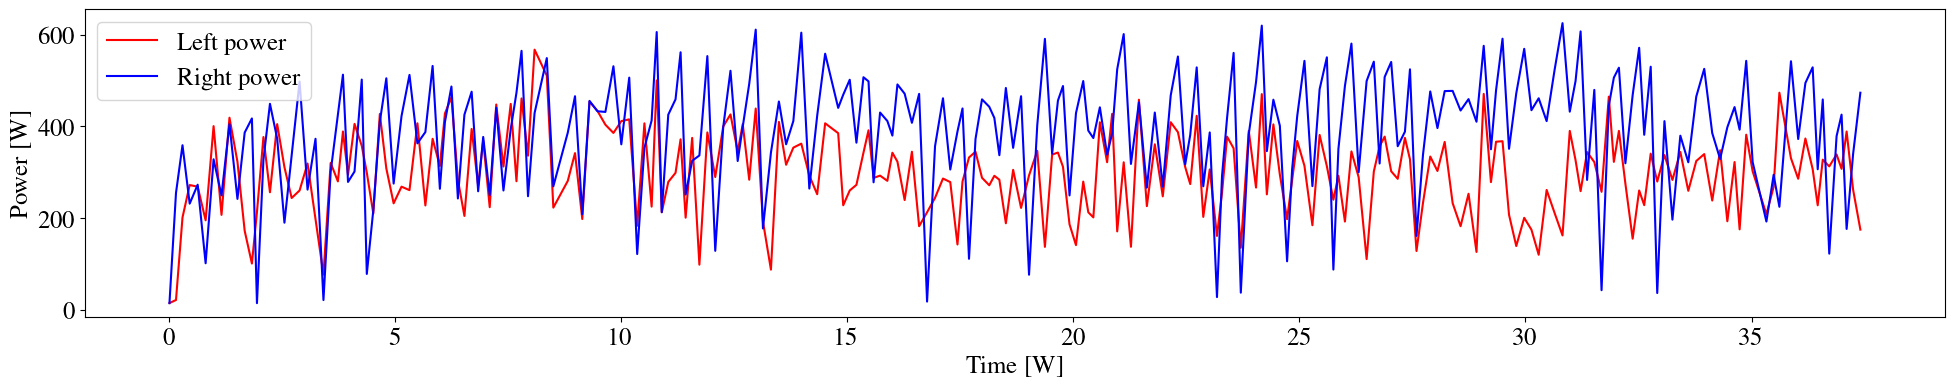

In [7]:
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(emm_df.time_rel, emm_df.PE_L, "r", label="Left power")
ax.plot(emm_df.time_rel, emm_df.PE_R, "b", label="Right power")
ax.set_ylabel("Power [W]")
ax.set_xlabel("Time [W]")
ax.legend()

(-15.828119999999998, 655.85212, -12.723515000000003, 595.1984150000001)

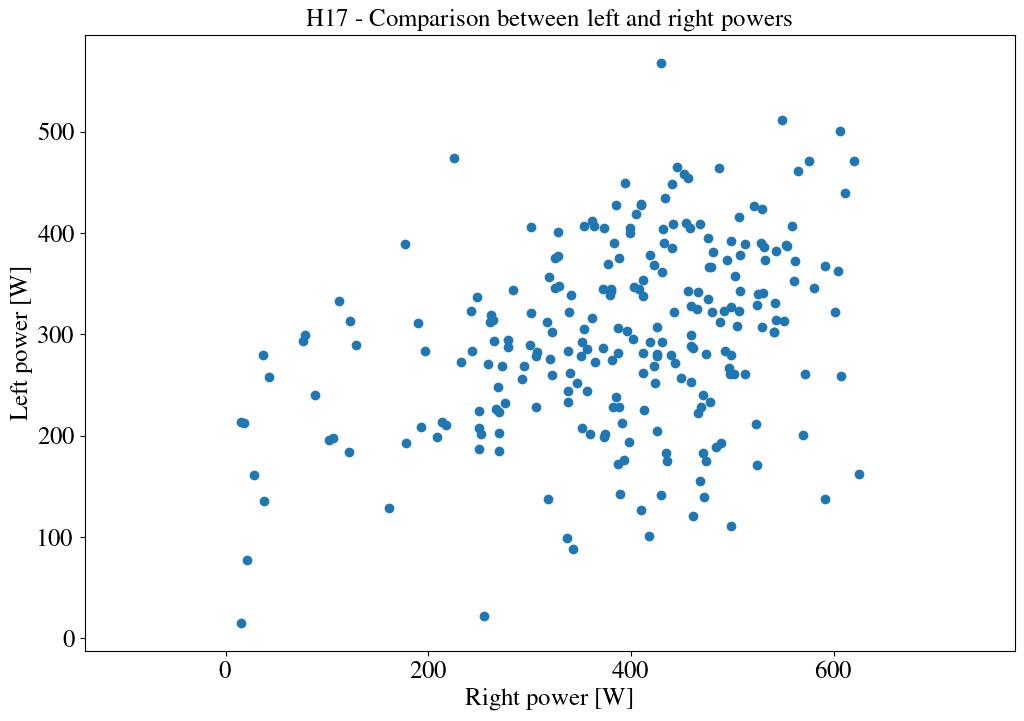

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(emm_df.PE_R, emm_df.PE_L, "o")
ax.set_title(f"{abbr} - Comparison between left and right powers")
ax.set_ylabel("Left power [W]")
ax.set_xlabel("Right power [W]")
ax.axis('equal')

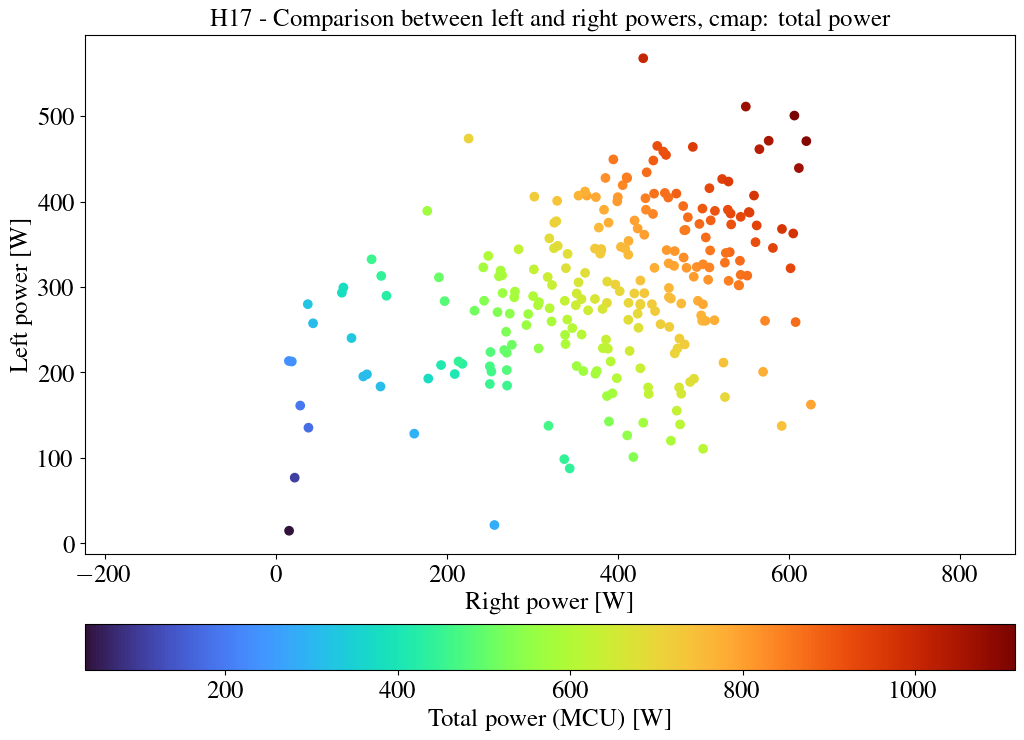

In [9]:
fig, ax = plt.subplots(figsize=(12, 9))
sc = ax.scatter(emm_df.PE_R, emm_df.PE_L, c=emm_df.P_total, cmap=cmap)
ax.set_title(f"{abbr} - Comparison between left and right powers, cmap: total power")
ax.set_ylabel("Left power [W]")
ax.set_xlabel("Right power [W]")
ax.axis('equal')
cb = fig.colorbar(sc, orientation="horizontal", pad=0.1);
cb.ax.set_xlabel("Total power (MCU) [W]");

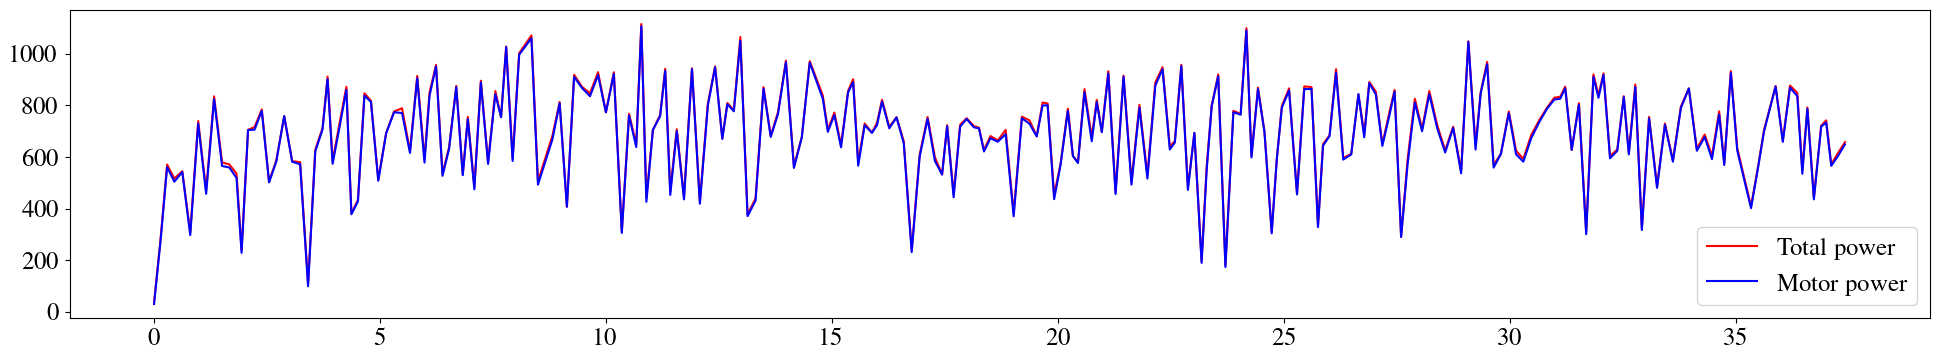

In [10]:
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(emm_df.time_rel, emm_df.P_total, "r", label="Total power")
ax.plot(emm_df.time_rel, emm_df.PE_motion, "b", label="Motor power")
ax.legend()


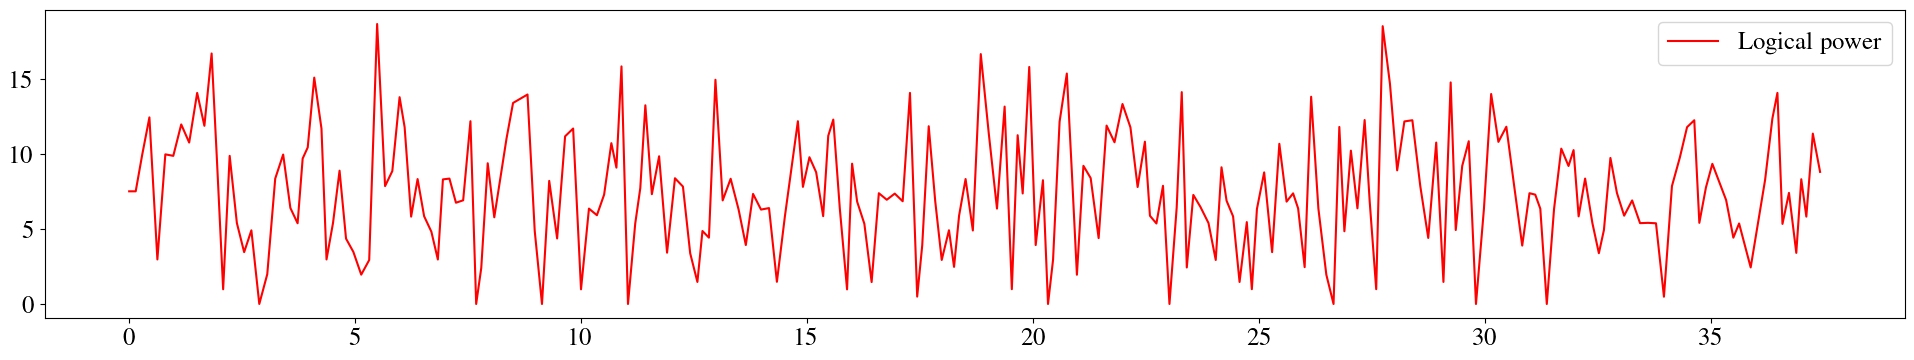

In [11]:
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(emm_df.time_rel, emm_df.P_logical, "r", label="Logical power")
ax.legend()

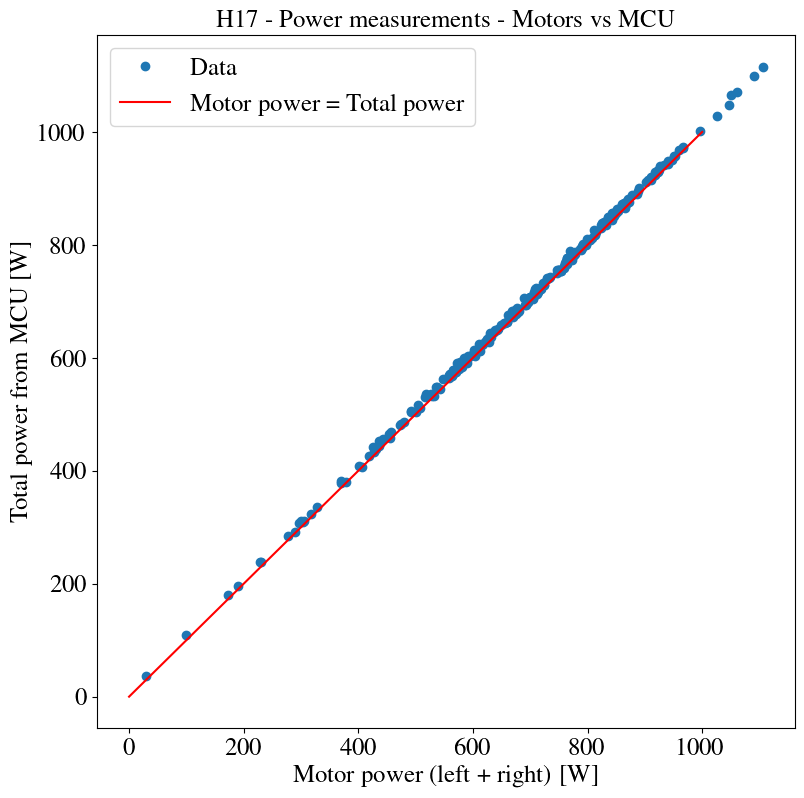

In [12]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(emm_df.PE_motion, emm_df.P_total, "o", label="Data")
ax.plot([0, 1000], [0, 1000], "r", label="Motor power = Total power")
ax.set_xlabel("Motor power (left + right) [W]")
ax.set_ylabel("Total power from MCU [W]")
ax.set_title(f"{abbr} - Power measurements - Motors vs MCU")
ax.legend()
fig.savefig(figdir / f"{abbr}_power_balance.jpg")


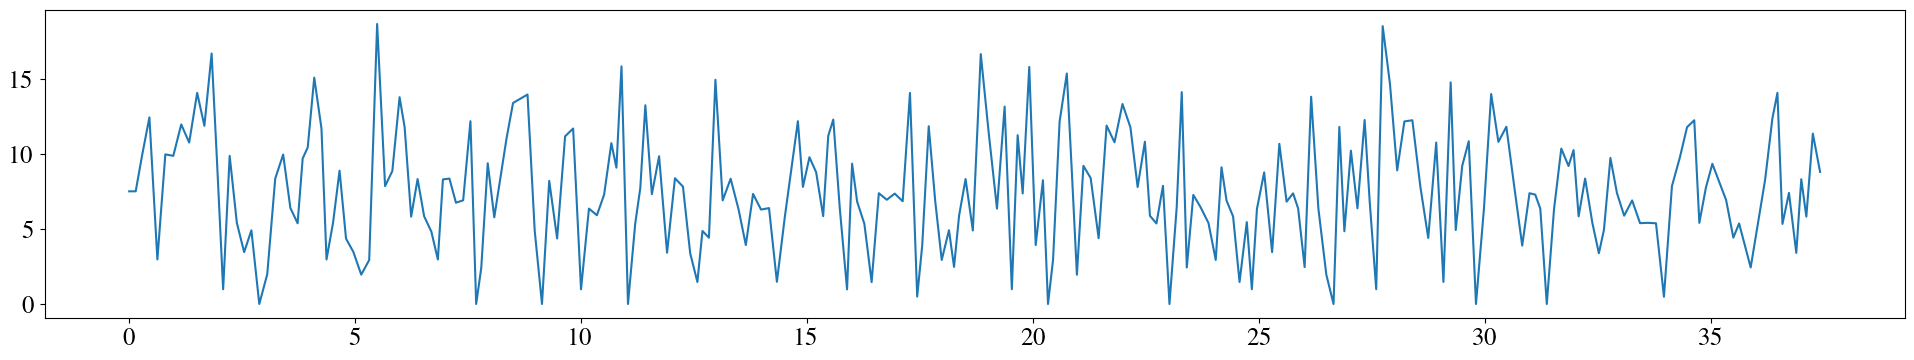

In [13]:
fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(emm_df.time_rel,emm_df.P_log)

Text(0.5, 0.98, 'H17 - Left motor responses')

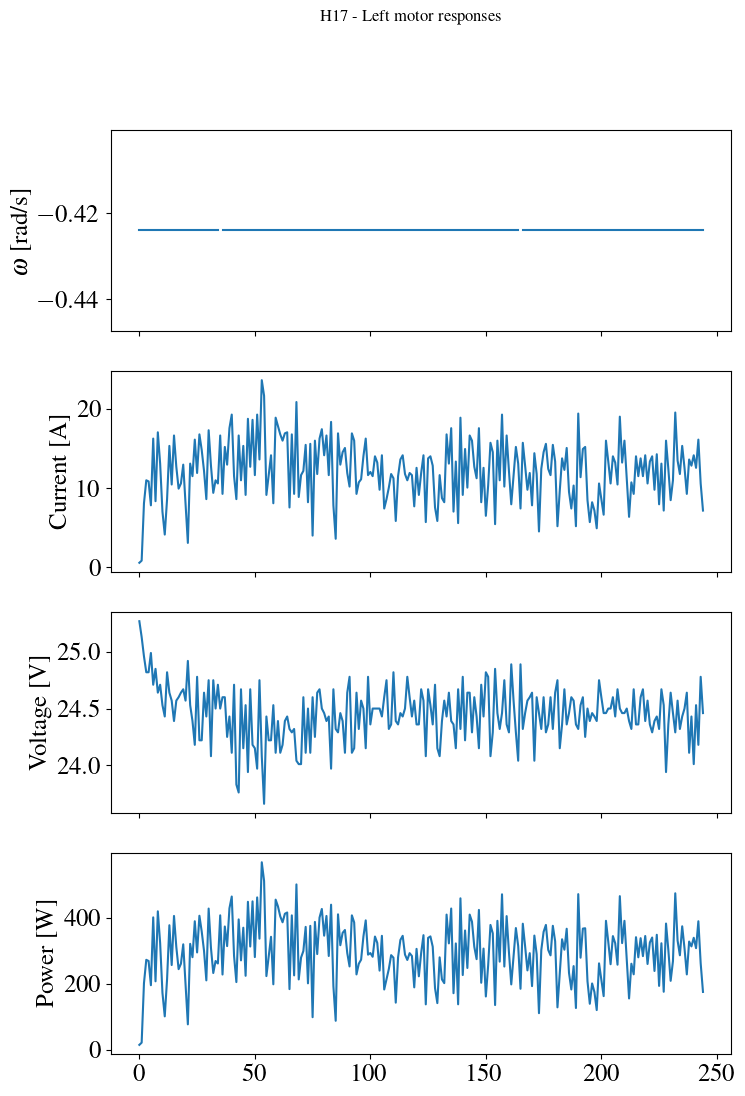

In [14]:
fig, axs = plt.subplots(nrows=4, sharex=True, figsize=((8,12)))
axs = axs.reshape(-1)

emm_df.wL.plot(ax=axs[0])
emm_df.I_L.plot(ax=axs[1])
emm_df.V_L.plot(ax=axs[2])
emm_df.PE_L.plot(ax=axs[3])

axs[0].set_ylabel("$\omega$ [rad/s]")
axs[1].set_ylabel("Current [A]")
axs[2].set_ylabel("Voltage [V]")
axs[3].set_ylabel("Power [W]")

fig.suptitle(f"{abbr} - Left motor responses")


Text(0.5, 0.98, 'H17 - Right motor responses during a doughnut calib')

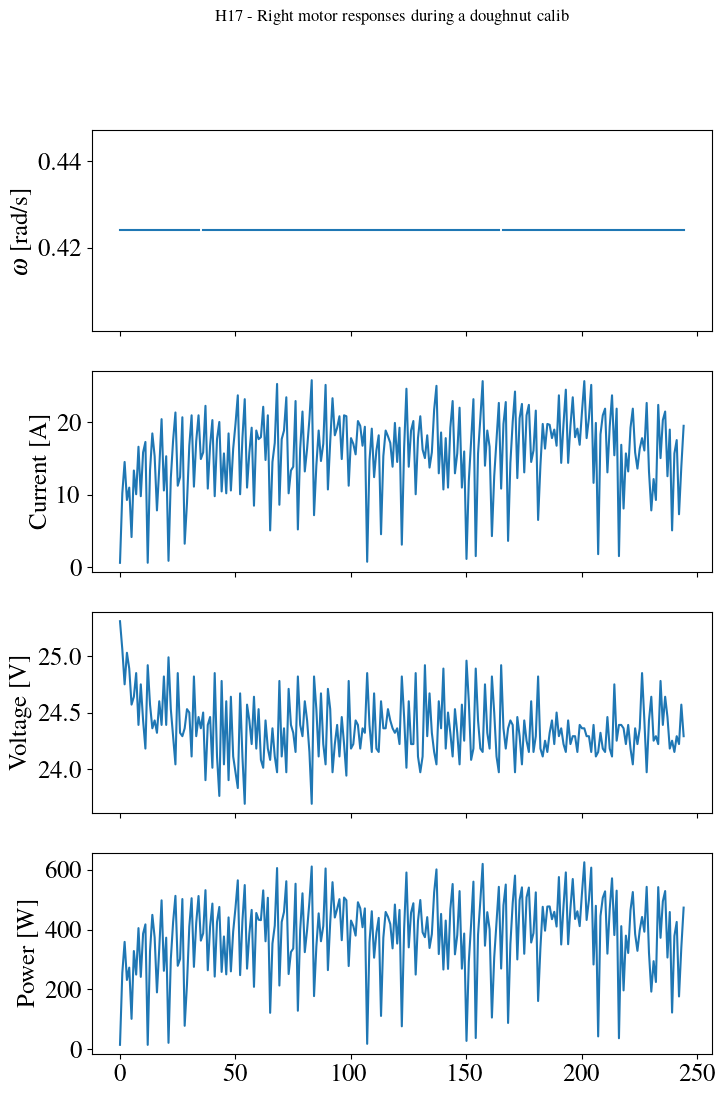

In [15]:
fig, axs = plt.subplots(nrows=4, sharex=True, figsize=((8,12)))
axs = axs.reshape(-1)

emm_df.wR.plot(ax=axs[0])
emm_df.I_R.plot(ax=axs[1])
emm_df.V_R.plot(ax=axs[2])
emm_df.PE_R.plot(ax=axs[3])

axs[0].set_ylabel("$\omega$ [rad/s]")
axs[1].set_ylabel("Current [A]")
axs[2].set_ylabel("Voltage [V]")
axs[3].set_ylabel("Power [W]")

fig.suptitle(f"{abbr} - Right motor responses during a doughnut calib")

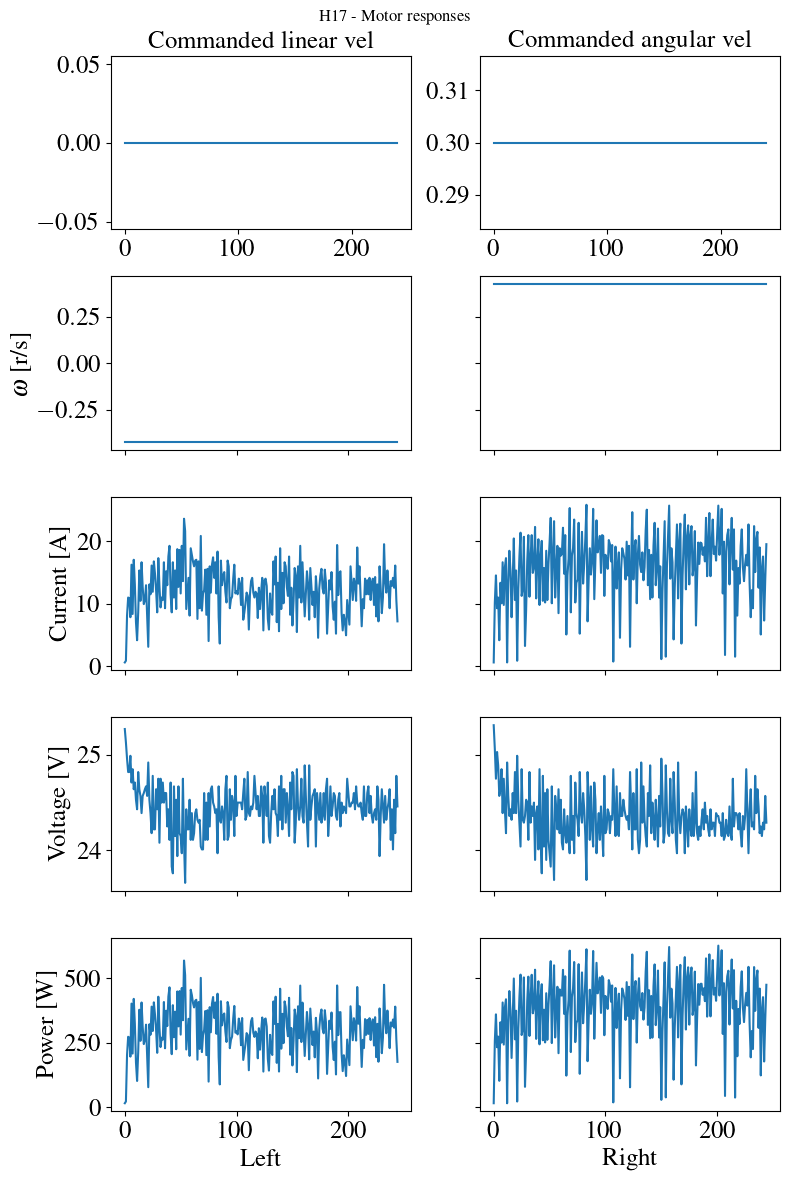

In [16]:
fig, axs = plt.subplots(nrows=5, ncols=2, sharex=True, sharey="row", figsize=((8,12)))
axs = axs.reshape(-1)

axs[0].remove()
axs[0] = fig.add_subplot(521)
axs[1].remove()
axs[1] = fig.add_subplot(522)

emm_df.cmd_v.plot(ax=axs[0])
axs[0].set_title("Commanded linear vel")
emm_df.cmd_w.plot(ax=axs[1])
axs[1].set_title("Commanded angular vel")

emm_df.wL.plot(ax=axs[2])
emm_df.I_L.plot(ax=axs[4])
emm_df.V_L.plot(ax=axs[6])
emm_df.PE_L.plot(ax=axs[8])

emm_df.wR.plot(ax=axs[3])
emm_df.I_R.plot(ax=axs[5])
emm_df.V_R.plot(ax=axs[7])
emm_df.PE_R.plot(ax=axs[9])

axs[8].set_xlabel("Left")
axs[9].set_xlabel("Right")

axs[2].set_ylabel("$\omega$ [r/s]")
axs[4].set_ylabel("Current [A]")
axs[6].set_ylabel("Voltage [V]")
axs[8].set_ylabel("Power [W]")

fig.suptitle(f"{abbr} - Motor responses", y=0.98)
fig.tight_layout()

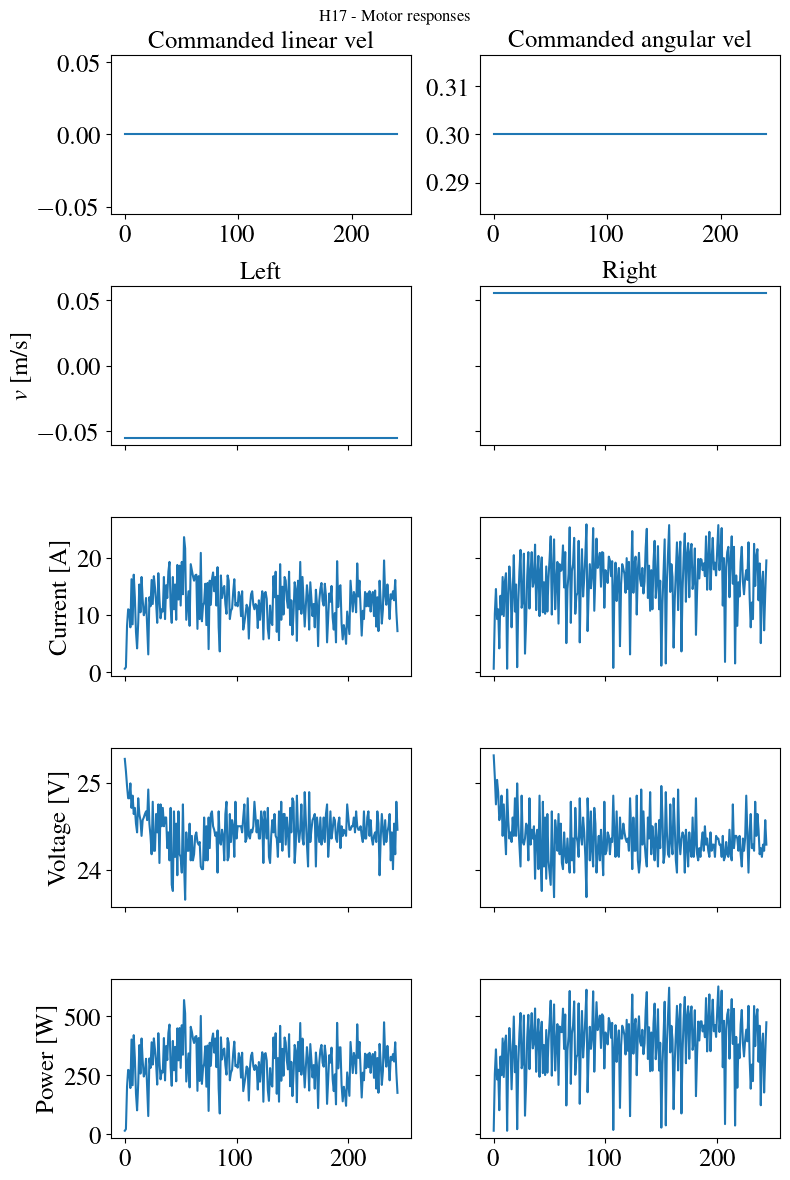

In [17]:
fig, axs = plt.subplots(nrows=5, ncols=2, sharex=True, sharey="row", figsize=((8,12)))
axs = axs.reshape(-1)

axs[0].remove()
axs[0] = fig.add_subplot(521)
axs[1].remove()
axs[1] = fig.add_subplot(522)

emm_df.cmd_v.plot(ax=axs[0])
axs[0].set_title("Commanded linear vel")
emm_df.cmd_w.plot(ax=axs[1])
axs[1].set_title("Commanded angular vel")

(emm_df.wL * emm_df.meta.ugv_wr).plot(ax=axs[2])
emm_df.I_L.plot(ax=axs[4])
emm_df.V_L.plot(ax=axs[6])
emm_df.PE_L.plot(ax=axs[8])

(emm_df.wR * emm_df.meta.ugv_wr).plot(ax=axs[3])
emm_df.I_R.plot(ax=axs[5])
emm_df.V_R.plot(ax=axs[7])
emm_df.PE_R.plot(ax=axs[9])

axs[2].set_title("Left")
axs[3].set_title("Right")

axs[2].set_ylabel("$v$ [m/s]")
axs[4].set_ylabel("Current [A]")
axs[6].set_ylabel("Voltage [V]")
axs[8].set_ylabel("Power [W]")

fig.suptitle(f"{abbr} - Motor responses", y=0.98)
fig.tight_layout()

fig.savefig(figdir / f"{abbr}_motors.jpg")

Text(0.5, 1.0, 'H17 - Left motor - Velocity vs power')

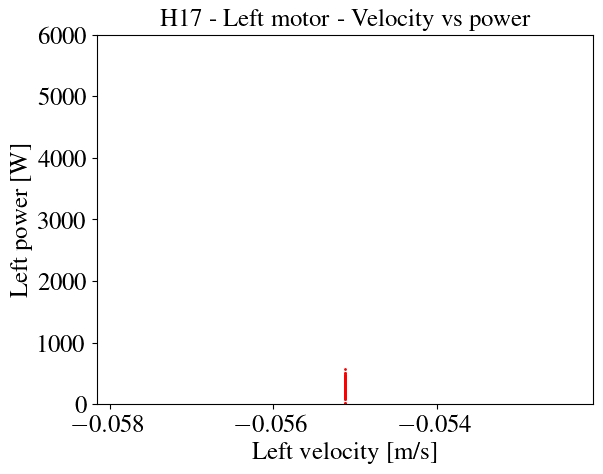

In [18]:
fig, ax = plt.subplots()
ax.plot(emm_df.wL * emm_df.meta.ugv_wr, emm_df.PE_L,  "ro", markersize=1)
ax.set_xlabel("Left velocity [m/s]")
ax.set_ylabel("Left power [W]")
ax.set_ylim((0, 6000))
ax.set_title(f"{abbr} - Left motor - Velocity vs power")

Text(0.5, 1.0, 'H17 - Right motor - Velocity vs power')

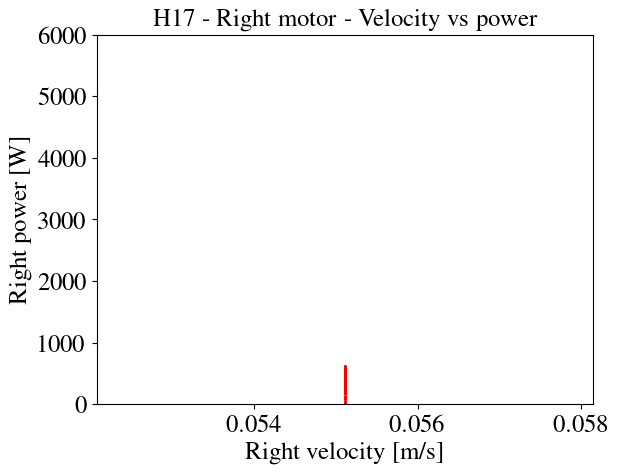

In [19]:
fig, ax = plt.subplots()
ax.plot(emm_df.wR * emm_df.meta.ugv_wr, emm_df.PE_R,  "ro", markersize=1)
ax.set_xlabel("Right velocity [m/s]")
ax.set_ylabel("Right power [W]")
ax.set_ylim((0, 6000))
ax.set_title(f"{abbr} - Right motor - Velocity vs power")